<a href="https://colab.research.google.com/github/annisaaseptianthy/AI_ML_prediction/blob/main/dibimbing_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# @title Import Data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import all the libraries and dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read the dataset using pandas
data = pd.read_csv('/content/drive/MyDrive/Dibimbing/Copy of student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# @title Exploratory Data Analysis
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Jumlah Data Aktual: 25
Jumlah data setelah menghapus duplikat: 25
Missing values:
 Hours     0
Scores    0
dtype: int64
Missing values setelah dihapus:
 Hours     0
Scores    0
dtype: int64


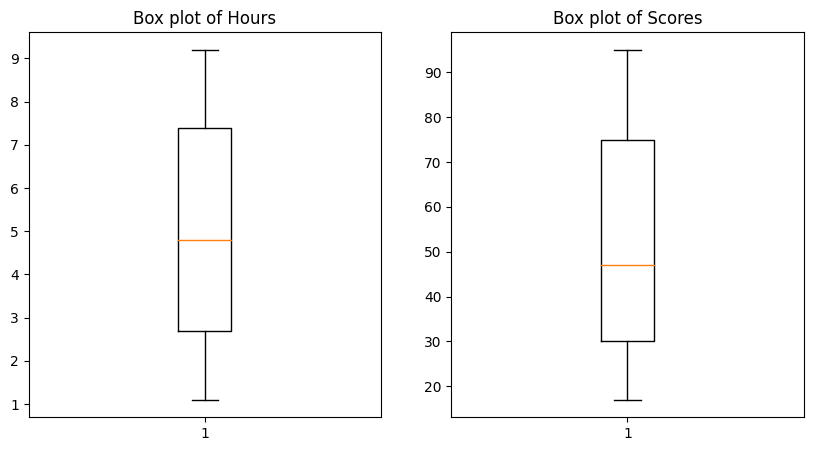

Jumlah data setelah menghapus outlier: 25


In [4]:
# @title Ensure Data Quality: Eliminate Duplicates, Address Missing Values, and Identify Outliers
print("Jumlah Data Aktual:", len(data))

# Menghapus duplikat
data = data.drop_duplicates()

# Memeriksa jumlah data setelah menghapus duplikat
print("Jumlah data setelah menghapus duplikat:", len(data))

# Memeriksa missing values
print("Missing values:\n", data.isnull().sum())

# Menghapus baris yang memiliki missing values
data = data.dropna()

# Memeriksa ulang missing values
print("Missing values setelah dihapus:\n", data.isnull().sum())

#check outlier
from scipy import stats

# Memvisualisasikan data dengan box plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(data['Hours'])
plt.title('Box plot of Hours')

plt.subplot(1, 2, 2)
plt.boxplot(data['Scores'])
plt.title('Box plot of Scores')
plt.show()

# Menghitung z-score untuk setiap kolom
z_scores = np.abs(stats.zscore(data[['Hours', 'Scores']]))

# Menentukan threshold untuk z-score (umumnya 3)
threshold = 3

# Menemukan data yang bukan outlier
data = data[(z_scores < threshold).all(axis=1)]

# Memeriksa jumlah data setelah menghapus outlier
print("Jumlah data setelah menghapus outlier:", len(data))

Dari Featuring Engineering diatas, didapatkan bahwa data tidak memiliki nilai duplikasi, outlier, atau nilai yang hilang sehingga bisa langsung melatih model pada seluruh dataset. Namun, tidak disarankan untuk melewati uji set karena alasan :
1.   Evaluasi Model: Membagi data memungkinkan Anda untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya, memberikan gambaran yang lebih akurat tentang bagaimana model akan bekerja pada data baru.
2.   Overfitting : Melatih model pada seluruh dataset tanpa pengujian dapat menyebabkan overfitting, di mana model terlalu baik dalam menghafal data pelatihan tetapi tidak bekerja dengan baik pada data baru.

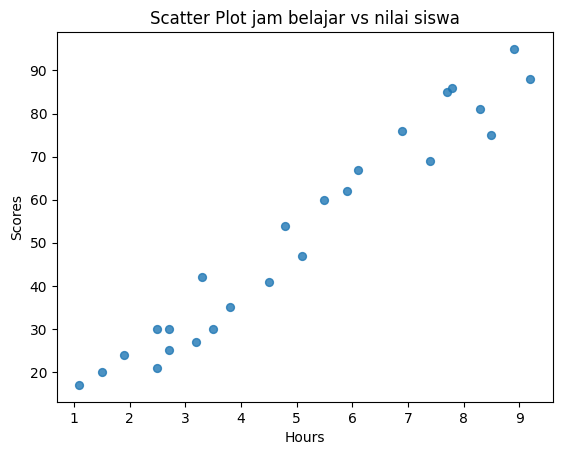

In [ ]:
# @title Scatter Plot (Hours vs Scores)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Hours', y='Scores', s=32, alpha=.8)
plt.title('Scatter Plot jam belajar vs nilai siswa')
plt.gca().spines[['top', 'right',]].set_visible(True)


In [ ]:
# @title Linear Regression
# Memisahkan fitur (X) dan target (y)
X = data['Hours'].values.reshape(-1, 1)  # Mengubah data menjadi 2D array
y = data['Scores'].values  # Target tetap dalam bentuk 1D array

# Membuat model regresi linear
model = LinearRegression()
model.fit(X, y)

LinearRegression()

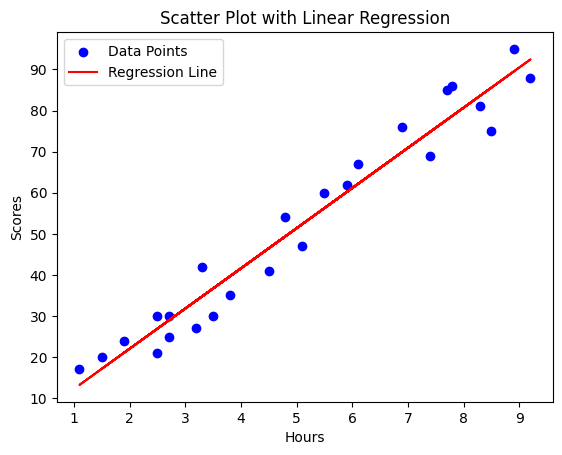

In [ ]:
# Prediksi nilai y menggunakan model regresi linear
y_pred = model.predict(X)

# Membuat scatter plot
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Scatter Plot with Linear Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [ ]:
# Menghitung nilai coef dan intercept
coef = model.coef_[0]
intercept = model.intercept_

print(f'Koefisien (slope): {coef}')
print(f'Intersep (y-intercept): {intercept}')

# Menghitung nilai R-squared
r_squared = model.score(X, y)

print(f'R-squared: {r_squared}')

Koefisien (slope): 9.775803390787468
Intersep (y-intercept): 2.48367340537321
R-squared: 0.9529481969048356


Ukuran X_train: (20, 1)
Ukuran X_test: (5, 1)
Ukuran y_train: (20,)
Ukuran y_test: (5,)
R-squared pada set pengujian (train-test split): 0.9678055545167994


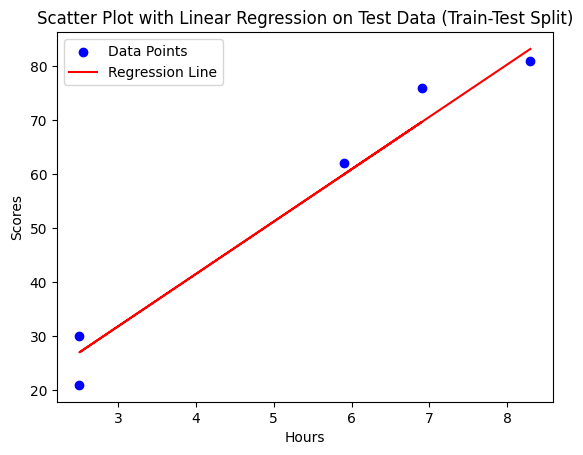

In [ ]:
# @title Linear Regression with train-test split

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

# Membuat model regresi linear
model_train_test = LinearRegression()
model_train_test.fit(X_train, y_train)

# Prediksi pada set pengujian
y_test_pred = model_train_test.predict(X_test)

# Menghitung nilai R-squared pada set pengujian
r2_test = r2_score(y_test, y_test_pred)

print(f'R-squared pada set pengujian (train-test split): {r2_test}')

# Membuat scatter plot dengan garis regresi pada set pengujian
plt.scatter(X_test, y_test, color='blue', label='Data Points')
plt.plot(X_test, y_test_pred, color='red', label='Regression Line')
plt.title('Scatter Plot with Linear Regression on Test Data (Train-Test Split)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

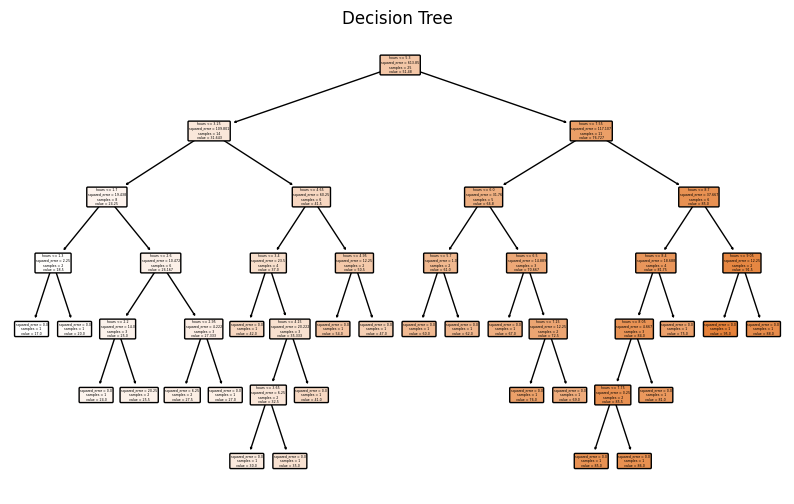

In [ ]:
# @title Decision Tree

from sklearn.tree import DecisionTreeRegressor, plot_tree

# Memisahkan fitur dan target
X = data['Hours'].values.reshape(-1, 1)  # Mengubah data menjadi 2D array
y = data['Scores'].values  # Target tetap dalam bentuk 1D array

# Membuat model decision tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X, y)

# Plot decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['hours'], filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()

In [ ]:
# Menghitung nilai R-squared untuk decision tree
r_squared_tree = tree_model.score(X, y)

print(f'R-squared (Decision Tree): {r_squared_tree}')

R-squared (Decision Tree): 0.996546385303501


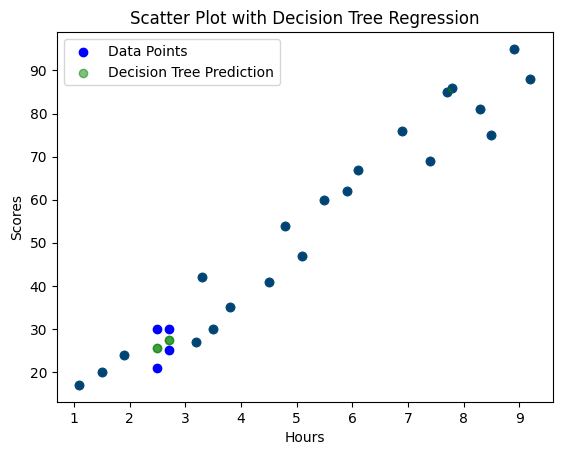

In [ ]:
# Prediksi nilai y menggunakan model decision tree
y_tree_pred = tree_model.predict(X)

# Membuat scatter plot dengan garis prediksi decision tree
plt.scatter(X, y, color='blue', label='Data Points')
plt.scatter(X, y_tree_pred, color='green', label='Decision Tree Prediction', alpha=0.5)
plt.title('Scatter Plot with Decision Tree Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

# R-score Comparation 2 Models

In [ ]:
print(f'R-score (Linear Regression): {r_squared}')
print(f'R-score (Linear Regression train-test split): {r2_test}')
print(f'R-score (Decision Tree): {r_squared_tree}')

R-score (Linear Regression): 0.9529481969048356
R-score (Linear Regression train-test split): 0.9678055545167994
R-score (Decision Tree): 0.996546385303501
